In [1]:
import math
from matplotlib import pyplot as plt
from file_converter import FileConverter
from n_grams import Ngrams

[nltk_data] Downloading package punkt to /home/pedro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Definição das variáveis globais

In [2]:
FOLHA94_ISO_DATASET = 'CHAVEFolha/folha94'
FOLHA95_ISO_DATASET = 'CHAVEFolha/folha95'

FOLHA94_DIR = 'folha94'
FOLHA95_DIR = 'folha95'

aux = FileConverter(FOLHA94_DIR, FOLHA94_ISO_DATASET)
FOLHA94_DATASET = aux.convert_files_to_utf_8()

aux = FileConverter(FOLHA95_DIR, FOLHA95_ISO_DATASET)
FOLHA95_DATASET = aux.convert_files_to_utf_8()

FOLHA94_DIR = 'corpus_utf_8/' + FOLHA94_DIR + '/'
FOLHA95_DIR = 'corpus_utf_8/' + FOLHA95_DIR + '/'

## Treinamento e Teste

In [3]:
f94 = Ngrams(FOLHA94_DATASET)
f95 = Ngrams(FOLHA95_DATASET)

training_base = f95.get_corpus(FOLHA95_DIR)
testing_base = f94.get_corpus(FOLHA94_DIR)

train_uni_gram, train_bi_gram, train_three_gram  = f95.make_n_grams(training_base)
test_uni_gram,test_bi_gram, test_three_gram = f94.make_n_grams(testing_base)

## Perplexidade

In [4]:
perp_arr = {}
for text_tag in testing_base:
    for sentence in text_tag:
        sentence_gram = f94.mask_n_gram(sentence, 2)
        prob_sum = 0
        for word_tuple in sentence_gram.keys():
            for word in sentence_gram[word_tuple].keys():
                p = f95.probability(word, word_tuple, train_three_gram, train_bi_gram, train_uni_gram)
                if p != 0:    
                    prob_sum = prob_sum + math.log(p)
        perp_arr[sentence] = math.exp(prob_sum)**(-1/float(len(sentence.split())))

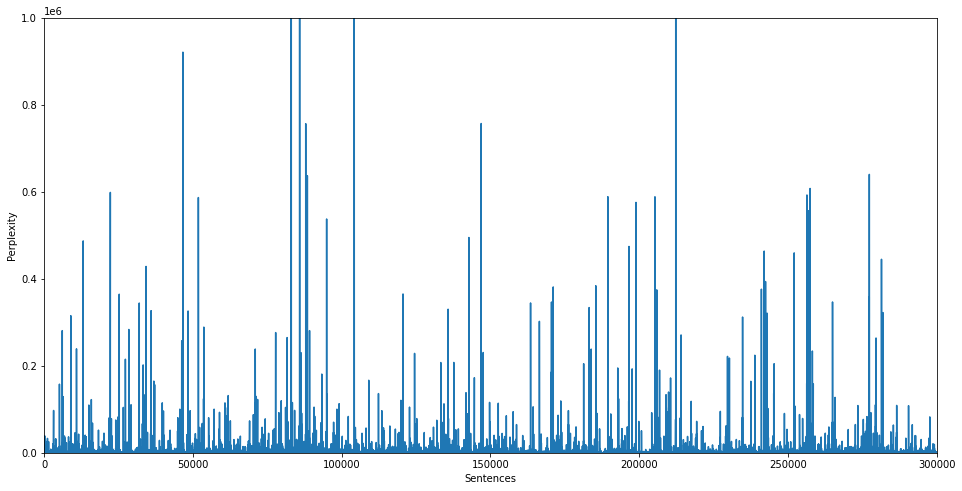

In [21]:
plt.figure(figsize=(16,8))
plt.xlabel('Sentences')
plt.ylabel('Perplexity')
plt.xlim([0, 30*10**4])
plt.ylim([0, 10**6])
plt.plot([i for i in range(len(perp_arr.keys()))], [perp_arr[k] for k in perp_arr.keys()])

In [6]:
ar = []
for k in perp_arr.keys():
    if perp_arr[k] > 100000:
        ar.append(k)

In [7]:
ar[:10]

['<s> <s> retirados número esquerda representa posição atual direita posição quinzena anterior </s> </s>',
 '<s> <s> paulo sérgio pinheiro  professor ciência política diretor núcleo estudos violência usp universidade paulo autor estratégias ilusão </s> </s>',
 '<s> <s> josé eduardo bandeira mello  presidenteexecutivo associação brasileira indústria farmacêutica abifarma </s> </s>',
 '<s> <s>  pensão alimentícia algum limite máximo dedução declaração ajuste anual </s> </s>',
 '<s> <s> contribuinte poderá deduzir total fixado acordo sentença judicial estar sujeito qualquer limite fixado legislação imposto renda </s> </s>',
 '<s> <s> fábio konder comparato  advogado doutor universidade paris frança professor titular faculdade direito usp autor livro para viver democracia fundador diretor escola governo </s> </s>',
 '<s> <s> joaquim falcão  professor direito constitucional ufrj universidade federal rio janeiro secretáriogeral fundação roberto marinho exmembro comissão affonso arinos </s> <

In [8]:
filtered_perp = [perp_arr[k] for k in perp_arr.keys() if perp_arr[k] < 100000]

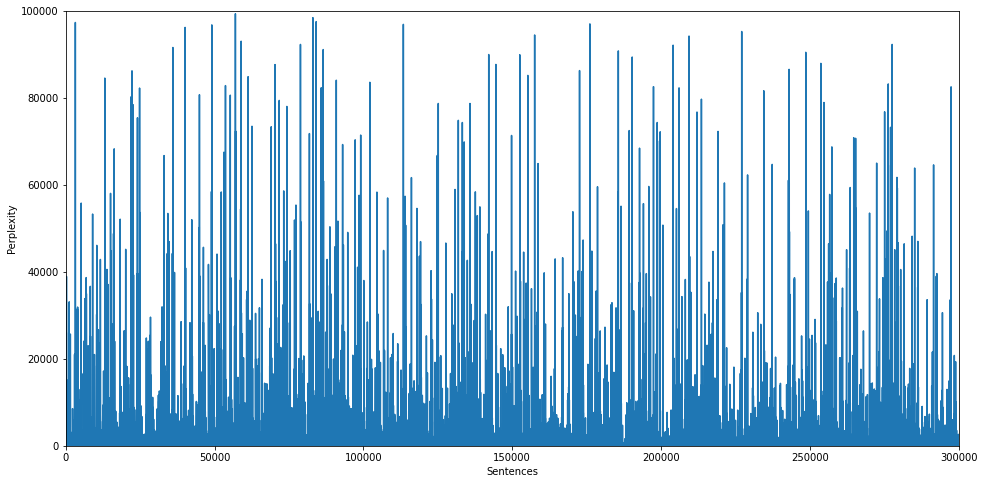

In [15]:
plt.figure(figsize=(16,8))
plt.xlabel('Sentences')
plt.ylabel('Perplexity')
plt.xlim([0, 30*10**4])
plt.ylim([0, 10**5])
plt.plot([i for i in range(len(filtered_perp))], [k for k in filtered_perp])